<a href="https://colab.research.google.com/github/JSEFERINO/CURSO5/blob/main/Leonel_Gil_10_Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

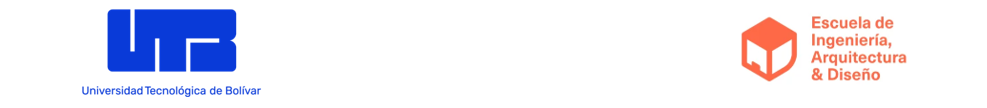


## **UNIVERSIDAD TECNOLÓGICA DE BOLÍVAR**
## **Laboratorio 10. Examen Parcial - Parte 2**
## **Estadística y Probabilidad**

Ensayo breve, junto con el paso a paso del laboratorio.

## **Leonel Alfonso Gil Palencia**
> Email:leonel.a.g.palencia.2@gmail.com

> Código Estudiantil: T00062419

## **Julio Seferino Hurtado Marquez**

Cartagena de Indias, 7 de Octubre del 2025.



# **RESUMEN**
### El laboratorio fue un ejercicio práctico con la misma dinámica con la que hemos venido trabajando en los laboratorios anteriores, en la cuál el Profe Julio nos comparte o nos hace llegar a través de nuestros correos electrónicos, el respectivo video que está en su canal de Youtube con todo el paso a paso de lo que se debe realizar, en este en particular, nos dejó una plantilla en COLAB que es en la cual estaremos trabajando y profundizando a continuación, en el video se recalca la importancia de algunos ajustes en particular con los cuales obtendremos mejores calificaciones o de lo contrario podrá afectarnos si no las tenemos en cuenta; así como también nos pidió terminar el laboratorio, ya que solo lo pudo realizar hasta poco mas de la mitad para que no se extendiera tanto el video.

### En este laboratorio 10 realizamos análisis estadístico y modelado de datos utilizando Python. Trabajamos con librerías como pandas, numpy, matplotlib, seaborn y statsmodels. El objetivo principal fue analizar una base de datos de estudiantes a través de estadísticas descriptivas, gráficos, muestreo aleatorio, técnicas de bootstrap y modelos de regresión lineal.

# **TABLA DE CONTENIDO**

<a name="inicio"></a>


## **1.** [Librerias para Trabajar en R y Python](#T1)
## **2.** [Base de Datos - Estudiando la base de datos - DataMinig](#T2)

## **3.** [Estadísticas Descriptivas (Variables Numéricas)](#T3)

## **4.** [Variables Cuantitativas - Gráficas BoxPlot e Histograma](#T4)

## **5.** [Verificando la Normalidad](#T5)

## **6.** [Tomando una muestra aleatoria de tamaño 50](#T6)

## **7.** [Tomando mil muestras -  Bootstraps para una variable](#T7)


## **8.** [Tomando mil muestras -  Bootstraps para Varias variables](#T8)

## **9.** [Regresión Lineal Simple](#T9)

## **10.** [Matriz de correlación](#T10)

## **11.** [Regresión lineal - MINIMOS CUADRADOS - Least Squares](#T11)




[ULTIMO](#ULTIMO)

[⬆️ Volver al inicio](#inicio)

<a name="T1"></a>
## **1. Librerias para Trabajar en R y Python**


### El laboratorio comenzó importando las librerías esenciales para el análisis estadístico y la visualización de datos. Se emplearon herramientas de Python como pandas para manejar los datos, numpy para realizar operaciones numéricas, y matplotlib y seaborn para crear gráficos. Además, se utilizaron scipy y statsmodels para llevar a cabo análisis estadísticos y regresiones. Esta configuración permitió establecer un entorno de trabajo que aseguraba que todas las funciones necesarias estuvieran listas para los cálculos y visualizaciones que vendrían después.

In [ ]:
# @title **A. Librerias para Trabar en Python**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sympy.functions.combinatorial.factorials import factorial
import math
from math import sqrt
from numpy.ma.core import log
from sympy import integrate, init_printing
from sympy.abc import x
print("Setup Complete")

Setup Complete


[⬆️ Volver al inicio](#inicio)

<a name="T2"></a>
## **2. Base de Datos - Estudiando la base de datos - DataMinig**


### A continuación, se cargó la base de datos desde un archivo CSV que se encontraba en un repositorio público. Se exploraron las dimensiones del conjunto, que incluía 74 filas y 26 columnas, tanto numéricas como categóricas, relacionadas con estudiantes de diferentes programas académicos. Se revisó el tipo de dato de cada columna y se identificaron valores nulos o inconsistencias. Durante este proceso, se encontró un valor faltante en la variable “Estrato”, que fue reemplazado por el valor más común. Además, se examinaron los distintos tipos de cursos, programas, estratos, medios de transporte y grupos sanguíneos para comprender mejor la composición general del conjunto de datos.

In [ ]:
# @title **A. Nuestra Base de datos en Pyhton**
url = 'https://raw.githubusercontent.com/JSEFERINO/Teoria-de-Probabilidad-MEYCD/main/DATOS202460ULTIMOS.csv'
df = pd.read_csv(url,delimiter=';')
df

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90,90,2.3,2.10,2314,F_NEGOCIOS,18,59,176,...,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO
70,PROBABILIDAD,85,95,2.0,3.10,2314,F_NEGOCIOS,18,60,171,...,BAJO,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO
71,ESTADISTICAI,65,75,1.7,2.95,1136,DERECHO,20,55,164,...,BAJO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO
72,ESTADISTICAI,100,100,2.3,3.20,2313,PSICOLOGÍA,19,67,171,...,BAJO,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO


In [ ]:
# @title **B. Cantidad de estudiantes y variables en Python**
No_estudiantes_y_Variables = df.shape
print('(No estudiantes, No Variables) = ',No_estudiantes_y_Variables)

(No estudiantes, No Variables) =  (74, 26)


In [ ]:
# @title **C. Mostrar información del tipo de las  variables y registros nulos (null) en Python**
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 26 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CURSO                                              74 non-null     object 
 1   ASISTENCIA2                                        74 non-null     int64  
 2   ASISTENCIA1                                        74 non-null     int64  
 3   PARCIAL 1                                          74 non-null     float64
 4   PARCIAL 2                                          74 non-null     float64
 5   NRC                                                74 non-null     int64  
 6   PROGRAMA                                           74 non-null     object 
 7   EDAD                                               74 non-null     int64  
 8   PESO                                               74 non-null     int64  
 9   ESTATURA    

In [ ]:
# @title **D. Mostrar los diferentes tipos de cursos en Python**
Tipos_cursos = df['CURSO'].unique()
print('Cursos=', Tipos_cursos)

Cursos= ['PROBABILIDAD' 'ESTADISTICAI']


In [ ]:
# @title **E. Mostrar los diferentes tipos de programas en Python**
Tipos_programas = df['PROGRAMA'].unique()
print('Programas=', Tipos_programas)

Programas= ['F_NEGOCIOS' 'DERECHO' 'MECANICA' 'PSICOLOGÍA' 'C_DATOS' 'SISTEMAS'
 'BIOMEDICA' 'INDUSTRIAL' 'ECONOMIA' 'MECATRONICA' 'NAVAL' 'C_SOCIAL'
 'QUIMICA' 'ELECTRICA' 'CIVIL' 'CONTADURIA']


In [ ]:
# @title **F. Mostrar los diferentes tipos de estratos en Python**
Tipos_estratos = df['ESTRATO'].unique()
print('Estratos=', Tipos_estratos)

Estratos= ['II' 'III' 'V' 'I' 'IV' nan]


In [ ]:
# @title **G. Mostrar la posicion de los estudiantes con "nan" en estrato en Python**
nan_estrato_positions = df[df['ESTRATO'].isnull()].index.tolist()
print("Posiciones de estudiantes con 'nan' en estrato:", nan_estrato_positions)

Posiciones de estudiantes con 'nan' en estrato: [17]


In [ ]:
# @title **H. Mostrar la posicion de los estudiantes con "nan" en estrato**
df['ESTRATO'].head(20)

,ESTRATO
0,II
1,III
2,III
3,V
4,II
5,I
6,IV
7,III
8,III
9,I


In [ ]:
# @title **I. Reemplazamos el dato perdido con el valosr mas frecuente de la variable**
df['ESTRATO'].fillna('II', inplace=True)
print(df['ESTRATO'].unique())

['II' 'III' 'V' 'I' 'IV']


In [ ]:
# @title **J. Mostrar los diferentes tipos de transporte**
Tipos_transporte = df['TRANSPORTE'].unique()
print('Transporte = ', Tipos_transporte)

Transporte =  ['Transcaribe' 'El bus que me deja mas cerca' 'Particular' 'Mototaxi'
 'Taxi']


In [ ]:
# @title **K. Cambia en TRANSPORTE "El bus que me deja mas cerca" por "Bus"**

df['TRANSPORTE'] = df['TRANSPORTE'].replace('El bus que me deja mas cerca', 'Bus')
print('Transporte = ', df['TRANSPORTE'].unique())

Transporte =  ['Transcaribe' 'Bus' 'Particular' 'Mototaxi' 'Taxi']


In [ ]:
# @title **L. Mostrar los diferentes tipos de grupos sanguíneos**
Tipos_sangre = df['GR_SANGUINEO'].unique()
print('Grupo Sanguíneo=', Tipos_sangre)

Grupo Sanguíneo= ['O positivo (O+)' 'A positivo (A +)' 'B positivo (B +)' 'O negativo (O-)']


In [ ]:
# @title **M. Cambia en TRANSPORTE "El bus que me deja mas cerca" por "Bus"**

df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('O positivo (O+)', 'O_POS')
df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('A positivo (A +)', 'A_POS')
df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('B positivo (B +)', 'B_POS')
df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('AB positivo (AB +)', 'AB_POS')
df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('O negativo (O -)', 'O_NEG')
df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('A negativo (A -)', 'A_NEG')
df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('B negativo (B -)', 'B_NEG')
df['GR_SANGUINEO'] = df['GR_SANGUINEO'].replace('AB negativo (AB -)', 'AB_NEG')
print('Grupo Sanguíneo=', df['GR_SANGUINEO'].unique())

Grupo Sanguíneo= ['O_POS' 'A_POS' 'B_POS' 'O negativo (O-)']


[⬆️ Volver al inicio](#inicio)

<a name="T3"></a>
## **3. Estadísticas Descriptivas (Variables Numéricas)**


### Una vez que se limpió la base de datos, se calcularon las estadísticas descriptivas básicas, como la media, la desviación estándar, así como los valores mínimos y máximos, y los cuartiles para las variables numéricas. Esto nos dio una visión general del comportamiento de los datos, como el promedio de asistencias y las notas parciales. También se llevó a cabo un análisis muy parecido para las variables categóricas, determinando la frecuencia y la moda de cada una, lo que nos ayudó a entender mejor la estructura sociodemográfica y académica de los estudiantes antes de avanzar hacia análisis más complejos.

In [ ]:
# @title **A. Estadísticas descriptivas generales**
stats_descriptivas = df.describe()
# Mostrar estadísticas descriptivas
stats_descriptivas

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,EDAD,PESO,ESTATURA
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,88.243243,86.756757,2.844595,3.114865,1549.851351,18.702703,63.324324,168.391892
std,17.564605,15.112193,0.994112,0.871022,619.364161,1.190484,11.354931,8.533283
min,5.000000,5.000000,0.900000,0.500000,1009.000000,17.000000,42.000000,153.000000
25%,85.000000,80.000000,2.000000,2.900000,1010.000000,18.000000,55.000000,163.000000
50%,90.000000,90.000000,2.850000,3.150000,1136.000000,18.000000,62.000000,168.000000
75%,100.000000,95.000000,3.600000,3.687500,2314.000000,19.000000,70.000000,174.000000
max,100.000000,100.000000,4.900000,4.650000,2314.000000,22.000000,102.000000,192.000000


In [ ]:
# @title **B. Estadísticas descriptivas para variables categóricas**
categ_stats = df[['CURSO', 'PROGRAMA', 'URBANO', 'TRANSPORTE', 'SEXO', 'ESTRATO', 'GR_SANGUINEO']].describe()

# Mostrar estadísticas descriptivas
categ_stats

,CURSO,PROGRAMA,URBANO,TRANSPORTE,SEXO,ESTRATO,GR_SANGUINEO
count,74,74,74,74,74,74,74
unique,2,16,28,5,2,5,4
top,PROBABILIDAD,F_NEGOCIOS,Cartagena,Transcaribe,Femenino,II,O_POS
freq,48,16,17,35,42,26,44


In [ ]:
# @title **D. Redefiniendo una variable - Una nueva Variable**
df['DEFINITIVA'] = df['PARCIAL 1']
df

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio,DEFINITIVA
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,...,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO,3.6
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,...,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO,0.9
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,...,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,3.9
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,...,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO,2.9
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,...,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90,90,2.3,2.10,2314,F_NEGOCIOS,18,59,176,...,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO,2.3
70,PROBABILIDAD,85,95,2.0,3.10,2314,F_NEGOCIOS,18,60,171,...,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO,2.0
71,ESTADISTICAI,65,75,1.7,2.95,1136,DERECHO,20,55,164,...,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO,1.7
72,ESTADISTICAI,100,100,2.3,3.20,2313,PSICOLOGÍA,19,67,171,...,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO,2.3


[⬆️ Volver al inicio](#inicio)

<a name="T4"></a>
## **4. Variables Cuantitativas - Gráficas BoxPlot e Histograma**


### Con los datos que recopilamos, nos pusimos a crear representaciones visuales de la distribución de las variables numéricas. Hicimos histogramas y diagramas de caja (boxplots) para ver cómo se dispersan los datos, la forma de las distribuciones y detectar posibles valores atípicos en variables como la edad, la estatura, el peso, las notas finales y las asistencias. Estas gráficas fueron clave para identificar comportamientos específicos, como agrupaciones de datos o desviaciones significativas. Al comparar las variables, pudimos apreciar la homogeneidad o variabilidad que existe dentro de la población estudiada.

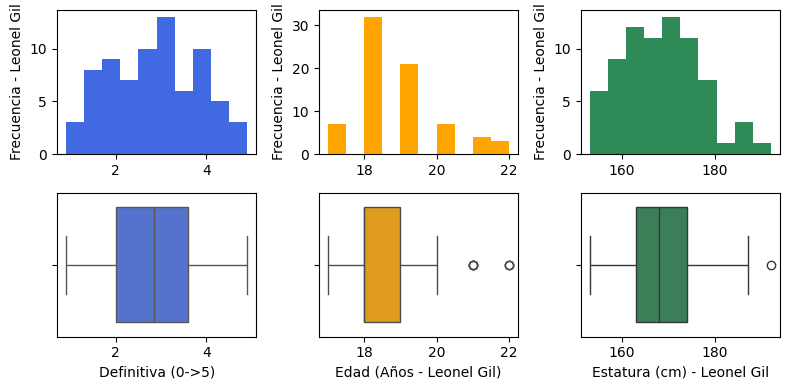

In [ ]:
# @title **A. Gráficas BoxPlot e Histograma: DEFINITIVA, EDAD, ESTATURA**
plt.figure(figsize=(8, 4))

# Histograma definitivas
plt.subplot(2, 3, 1)
plt.hist(df['DEFINITIVA'], bins=10, color='royalblue')
plt.ylabel('Frecuencia - Leonel Gil')

# Histograma de edades
plt.subplot(2, 3, 2)
plt.hist(df['EDAD'], bins=10, color='orange')
plt.ylabel('Frecuencia - Leonel Gil')

# Boxplot de las definitivas
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='DEFINITIVA', color='royalblue')
plt.xlabel('Definitiva (0->5)')

# Boxplot Edad
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='EDAD', color='orange')
plt.xlabel('Edad (Años - Leonel Gil)')

# Histograma de la estatura
plt.subplot(2, 3, 3)
plt.hist(df['ESTATURA'], bins=10, color='seagreen')
plt.ylabel('Frecuencia - Leonel Gil')

# Boxplot de estatura
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='ESTATURA', color='seagreen')
plt.xlabel('Estatura (cm) - Leonel Gil')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


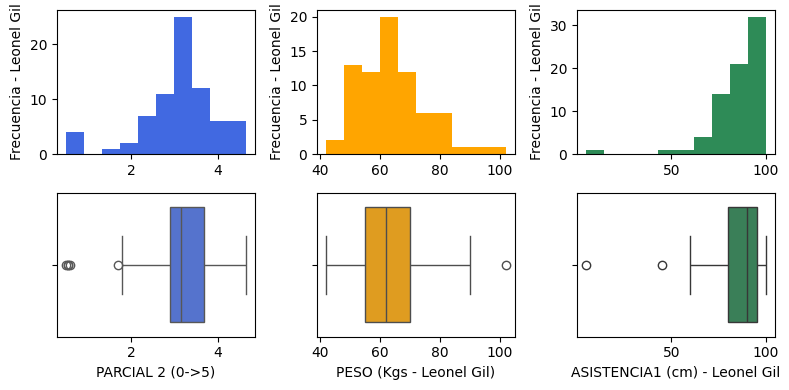

In [ ]:
# @title **B. Gráficas BoxPlot e Histograma:PARCIAL 2, PESO, ASISTENCIA1**
plt.figure(figsize=(8, 4))

# Histograma PARCIAL 2
plt.subplot(2, 3, 1)
plt.hist(df['PARCIAL 2'], bins=10, color='royalblue')
# plt.title('Distribución de las Definitivas')
# plt.xlabel('Definitiva (0->5)')
plt.ylabel('Frecuencia - Leonel Gil')

# Histograma de edades
plt.subplot(2, 3, 2)
plt.hist(df['PESO'], bins=10, color='orange')
# plt.title('Distribución de Edad')
# plt.xlabel('Edad (Años)')
plt.ylabel('Frecuencia - Leonel Gil')

# Boxplot de las PARCIAL 2
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='PARCIAL 2', color='royalblue')
# plt.title('Distribución de Notas Definitivas')
plt.xlabel('PARCIAL 2 (0->5)')

# Boxplot PESO
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='PESO', color='orange')
plt.xlabel('PESO (Kgs - Leonel Gil)')
# plt.title('Distribución de Notas Definitivas')

# Histograma de la ASISTENCIA1
plt.subplot(2, 3, 3)
plt.hist(df['ASISTENCIA1'], bins=10, color='seagreen')
# plt.title('Distribución de Asistencia')
plt.ylabel('Frecuencia - Leonel Gil')
# plt.xlabel('Estatura (cm)')

# Boxplot de ASISTENCIA1
plt.subplot(2, 3, 6)
sns.boxplot(data=df, x='ASISTENCIA1', color='seagreen')
# plt.title('Distribución de la Asistencia')
plt.xlabel('ASISTENCIA1 (cm) - Leonel Gil')

# ajustar espaciado entre subplot
plt.tight_layout()
plt.show()


[⬆️ Volver al inicio](#inicio)

<a name="T5"></a>
## **5. Verificando la Normalidad**




### En esta fase, se llevó a cabo un análisis de las distribuciones de las variables para verificar si se ajustaban a una forma aproximadamente normal. Se utilizaron histogramas junto con curvas de densidad superpuestas para observar de manera visual la simetría y la dispersión. Esta comprobación de la normalidad es fundamental en estadística, ya que determina si se pueden aplicar ciertos métodos paramétricos. Se observó que algunas variables tenían una distribución bastante cercana a la normal, mientras que otras presentaban asimetrías típicas de datos reales en contextos educativos y sociales.

In [ ]:
# @title **A. Recordando nuestra variables**
df.columns

Index(['CURSO', 'ASISTENCIA2', 'ASISTENCIA1', 'PARCIAL 1', 'PARCIAL 2', 'NRC',
       'PROGRAMA', 'EDAD', 'PESO', 'ESTATURA', 'SEXO', 'ESTADO_CIVIL',
       'ESTRATO', 'URBANO', 'TRANSPORTE', 'GR_SANGUINEO',
       ' A: Facilidad para aprender cosas nuevas', 'B: Memoria y atención',
       'C: Relacionar tu experiencias con lo que aprendes', 'D: Autoestima',
       'E: Actitud hacia el Aprendizaje', 'F: Ambiente Familiar para estudiar',
       'G: Ansiedad académica', 'H: Recursos Educativos',
       'I: Mentalidad para superar adversidades',
       'K: Regularidad en el estudio', 'DEFINITIVA'],
      dtype='object')

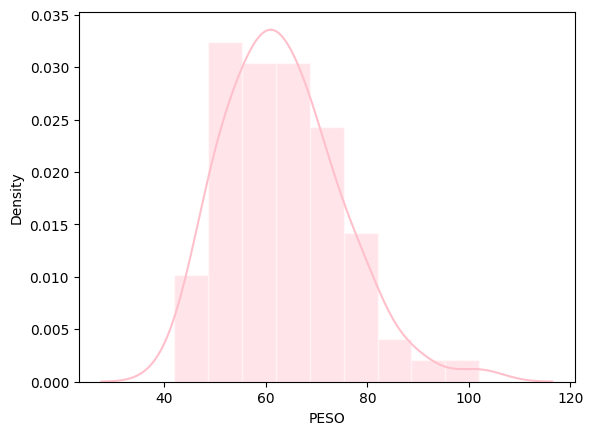

In [ ]:
# @title **B. Histograma vs Densidad Normal - PESO**

sns.histplot(df['PESO'], kde=True, stat="density", color='pink', kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

plt.show()

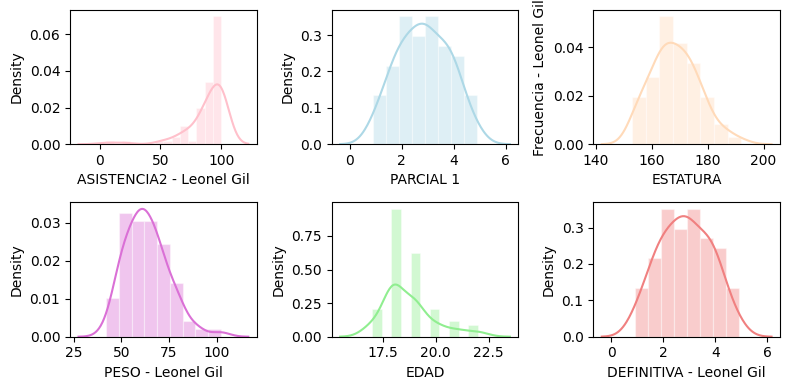

In [ ]:
# @title **C. Histograma vs Densidad Normal - Todas las variables**
plt.figure(figsize=(8, 4))

# Boxplot de las ASISTENCIA2
plt.subplot(2, 3, 1)
sns.histplot(df['ASISTENCIA2'], kde=True, stat="density", color='pink',
    kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.xlabel('ASISTENCIA2 - Leonel Gil')

# Boxplot de las PARCIAL 1
plt.subplot(2, 3, 2)
sns.histplot(df['PARCIAL 1'], kde=True, stat="density", color='lightblue',
    kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.xlabel('PARCIAL 1')

# Boxplot de las PESO
plt.subplot(2, 3, 4)
sns.histplot(df['PESO'], kde=True, stat="density", color='orchid',
    kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.xlabel('PESO - Leonel Gil')

# Boxplot EDAD
plt.subplot(2, 3, 5)
sns.histplot(df['EDAD'], kde=True, stat="density", color='lightgreen',
    kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)

# Histograma de la ESTATURA
plt.subplot(2, 3, 3)
sns.histplot(df['ESTATURA'], kde=True, stat="density", color='peachpuff',
    kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.ylabel('Frecuencia - Leonel Gil')

# Boxplot de DEFINITIVA
plt.subplot(2, 3, 6)
sns.histplot(df['DEFINITIVA'], kde=True, stat="density", color='lightcoral',
    kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4),)
plt.xlabel('DEFINITIVA - Leonel Gil')

# ajustar espaciado entre subplot
plt.tight_layout()
plt.show()


[⬆️ Volver al inicio](#inicio)

<a name="T6"></a>
## **6. Tomando una muestra aleatoria**


### Aquí se llevó a cabo un procedimiento de muestreo aleatorio simple, eligiendo 50 observaciones de todo el conjunto de datos. Esta muestra se utilizó para representar una parte de la población y facilitar las comparaciones estadísticas. Con esta selección, se generaron nuevamente gráficos de distribución, lo que permitió ver cómo las características principales del conjunto original se mantenían en la muestra. Este paso fue fundamental para entender la importancia de la representatividad muestral en los estudios estadísticos.

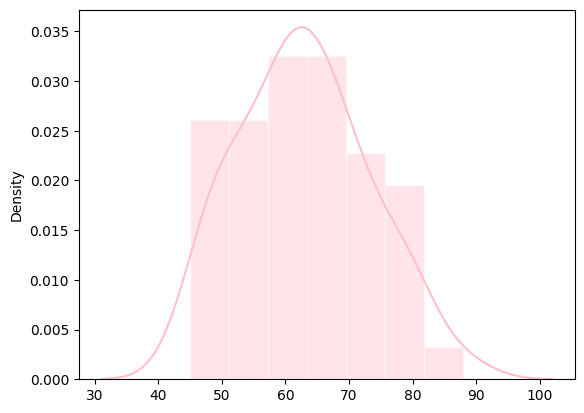

In [ ]:
# @title **A. Tomando una muestra aleatoria**
tamano_muestra = 50
muestra_principal = np.random.choice(df['PESO'],
                                     tamano_muestra) # choice nos permmite sacar unos datos

sns.histplot(muestra_principal, kde=True, stat="density", color='pink', kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

plt.show()

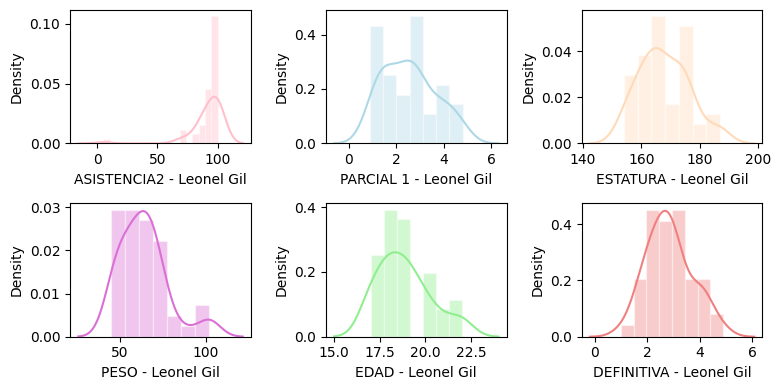

In [ ]:
# @title **B. Histograma vs Densidad Normal - Todas las variables**
plt.figure(figsize=(8, 4))

tamano_muestra = 50

# Histograma de ASISTENCIA2
plt.subplot(2, 3, 1)
muestra_principal1 = np.random.choice(df['ASISTENCIA2'], tamano_muestra)
sns.histplot(muestra_principal1, kde=True, stat="density", kde_kws=dict(cut=3),
    color='pink', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('ASISTENCIA2 - Leonel Gil')

# Histograma de PARCIAL 1
plt.subplot(2, 3, 2)
muestra_principal2 = np.random.choice(df['PARCIAL 1'], tamano_muestra)
sns.histplot(muestra_principal2, kde=True, stat="density", kde_kws=dict(cut=3),
    color='lightblue', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('PARCIAL 1 - Leonel Gil')

# Histograma de PESO
plt.subplot(2, 3, 4)
muestra_principal3 = np.random.choice(df['PESO'], tamano_muestra)
sns.histplot(muestra_principal3, kde=True, stat="density", kde_kws=dict(cut=3),
    color='orchid', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('PESO - Leonel Gil')

# Histograma de EDAD
plt.subplot(2, 3, 5)
muestra_principal4 = np.random.choice(df['EDAD'], tamano_muestra)
sns.histplot(muestra_principal4, kde=True, stat="density", kde_kws=dict(cut=3),
    color='lightgreen', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('EDAD - Leonel Gil')

# Histograma de ESTATURA
plt.subplot(2, 3, 3)
muestra_principal5 = np.random.choice(df['ESTATURA'], tamano_muestra)
sns.histplot(muestra_principal5, kde=True, stat="density", kde_kws=dict(cut=3),
    color='peachpuff', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('ESTATURA - Leonel Gil')

# Histograma de DEFINITIVA
plt.subplot(2, 3, 6)
muestra_principal6 = np.random.choice(df['DEFINITIVA'], tamano_muestra)
sns.histplot(muestra_principal6, kde=True, stat="density", kde_kws=dict(cut=3),
    color='lightcoral', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('DEFINITIVA - Leonel Gil')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.show()


[⬆️ Volver al inicio](#inicio)

<a name="T7"></a>
## **7. Tomando mil muestras -  para una variable**




### En este punto, se presentó la técnica de bootstrap, que consiste en crear múltiples muestras con reemplazo a partir de la muestra original. Se tomaron mil muestras para una sola variable, lo que permitió calcular la distribución de sus medias. Esta metodología es útil para estimar la variabilidad y la precisión de los estimadores, sin tener que asumir una normalidad estricta. Los resultados se visualizaron a través de histogramas que mostraban cómo las medias muestrales tendían a agruparse alrededor del valor central, lo que demuestra el teorema del límite central.

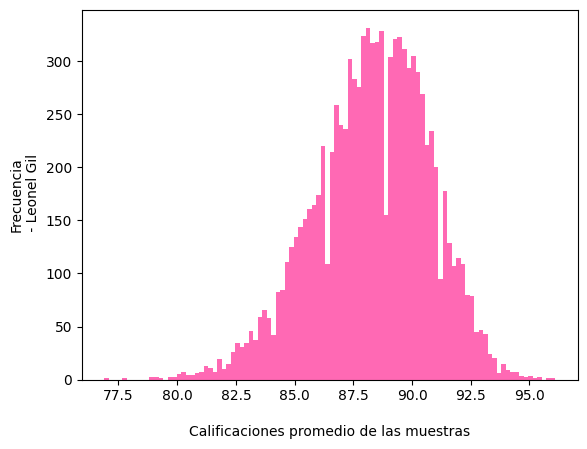

In [ ]:
# **A. Usando la tecnica de BootStrap seleccionaremos 1000 muestras aleatorias y las guardaremos**
muestras1 = np.array([]) #En este espacio guardaremos cada muestra tomada
num_muestras = 10000 # Este será el tamaño de las muestra
for m in range(num_muestras): # Con este procedimiento grantizamos tomar las mil muestras
    muestras1 = np.append(muestras1,
                         np.random.choice(df['ASISTENCIA2'],
                                          tamano_muestra,
                                          replace=True)) # guardamos en muestras las seleccionadas de la poblacion inicial
muestras1 = muestras1.reshape(-1, tamano_muestra)
muestras1.shape, muestras1 # nos muestras el tamaño del archivo y las muestras

# **d. Estamos realizando el muestreo de medias**
plt.hist(muestras1.mean(axis=1), bins=100, color="hotpink") # Histograma de la distribución muestral de la media
plt.xlabel("\nCalificaciones promedio de las muestras")
plt.ylabel("Frecuencia\n - Leonel Gil")
plt.show()

<Axes: ylabel='Density'>

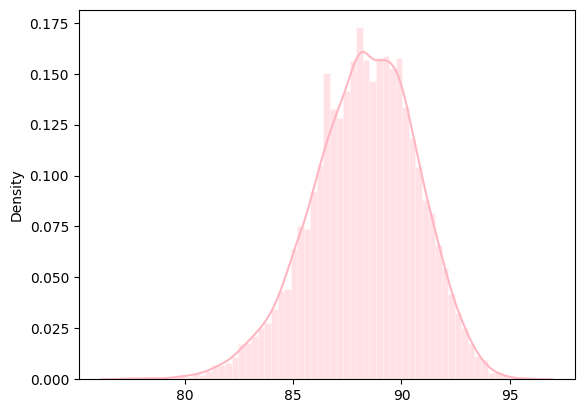

In [ ]:
# **B. Usando la tecnica de BootStrap seleccionaremos 1000 muestras aleatorias y las guardaremos**
sns.histplot(muestras1.mean(axis=1), kde=True, stat="density", color="lightpink", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),)

[⬆️ Volver al inicio](#inicio)

<a name="T8"></a>
## **8. Tomando mil muestras -  Bootstraps para varias variables**


### Cómo lo indica el subtitulo se expandió la técnica de Bootstrap para aplicarla de manera simultánea a varias variables cuantitativas. Se calcularon las medias muestrales de asistencia, parcial 1, peso, edad, estatura y definitiva, generando sus respectivas distribuciones. Los resultados se presentaron en un conjunto de gráficos que ilustraban cómo las medias obtenidas a través de múltiples remuestreos se acercaban a una distribución normal. Esta fase ayudó a fortalecer la comprensión del muestreo estadístico y la estabilidad de los parámetros al utilizar métodos de remuestreo computacional.

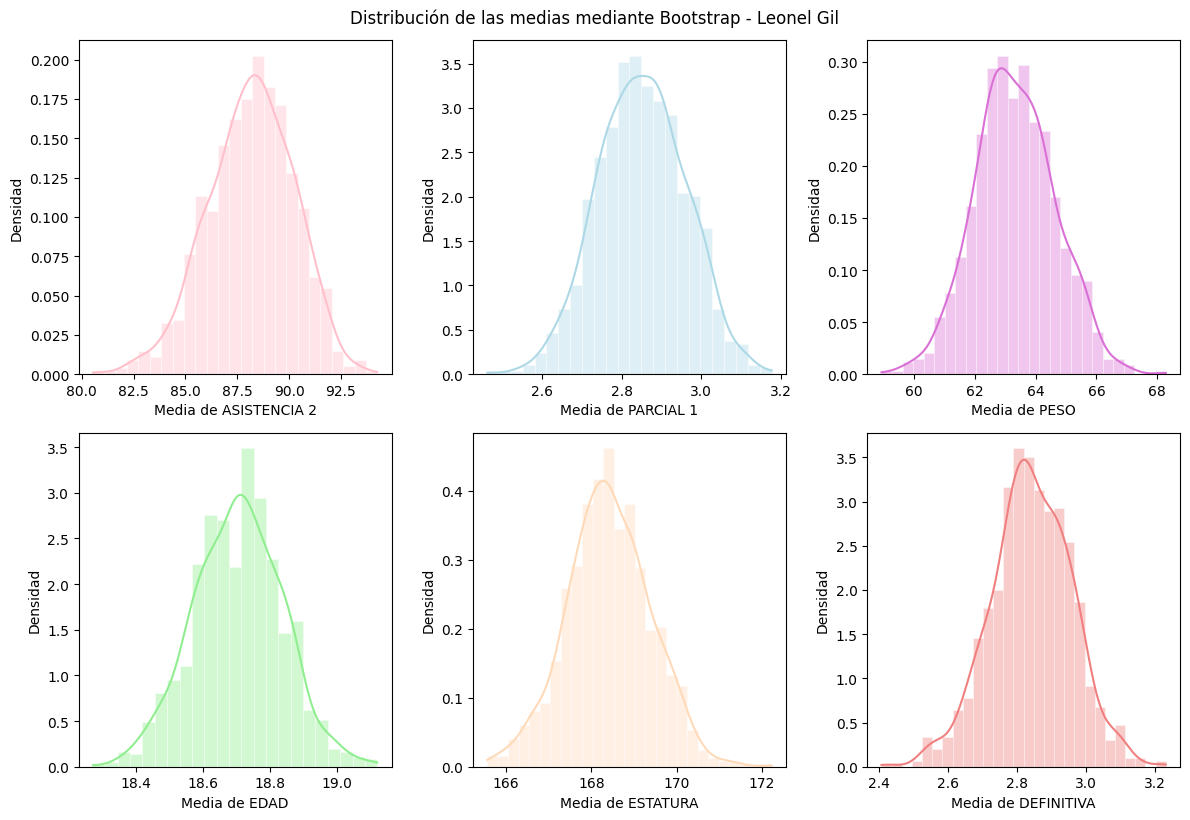

In [ ]:
# @title **A. Usando la técnica de Bootstrap seleccionaremos 1000 muestras aleatorias y las guardaremos**
plt.figure(figsize=(12, 8))

# Inicializamos arrays para almacenar las medias de cada muestra
medias_asistencia = np.array([])
medias_parcial1 = np.array([])
medias_peso = np.array([])
medias_edad = np.array([])
medias_estatura = np.array([])
medias_definitiva = np.array([])

num_muestras = 1000  # Número de muestras bootstrap
tamano_muestra = len(df)  # Tamaño de cada muestra (mismo que el dataset original)

for _ in range(num_muestras):
    # Muestra bootstrap para cada variable y calculamos su media
    muestra_asistencia = np.random.choice(df['ASISTENCIA2'], tamano_muestra, replace=True)
    medias_asistencia = np.append(medias_asistencia, np.mean(muestra_asistencia))

    muestra_parcial1 = np.random.choice(df['PARCIAL 1'], tamano_muestra, replace=True)
    medias_parcial1 = np.append(medias_parcial1, np.mean(muestra_parcial1))

    muestra_peso = np.random.choice(df['PESO'], tamano_muestra, replace=True)
    medias_peso = np.append(medias_peso, np.mean(muestra_peso))

    muestra_edad = np.random.choice(df['EDAD'], tamano_muestra, replace=True)
    medias_edad = np.append(medias_edad, np.mean(muestra_edad))

    muestra_estatura = np.random.choice(df['ESTATURA'], tamano_muestra, replace=True)
    medias_estatura = np.append(medias_estatura, np.mean(muestra_estatura))

    muestra_definitiva = np.random.choice(df['DEFINITIVA'], tamano_muestra, replace=True)
    medias_definitiva = np.append(medias_definitiva, np.mean(muestra_definitiva))

# Visualización de las distribuciones de las medias
plt.subplot(2, 3, 1)
sns.histplot(medias_asistencia, kde=True, stat="density",
             color='pink', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('Media de ASISTENCIA 2')
plt.ylabel('Densidad')

plt.subplot(2, 3, 2)
sns.histplot(medias_parcial1, kde=True, stat="density",
             color='lightblue', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('Media de PARCIAL 1')
plt.ylabel('Densidad')

plt.subplot(2, 3, 3)
sns.histplot(medias_peso, kde=True, stat="density",
             color='orchid', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('Media de PESO')
plt.ylabel('Densidad')

plt.subplot(2, 3, 4)
sns.histplot(medias_edad, kde=True, stat="density",
             color='lightgreen', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('Media de EDAD')
plt.ylabel('Densidad')

plt.subplot(2, 3, 5)
sns.histplot(medias_estatura, kde=True, stat="density",
             color='peachpuff', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('Media de ESTATURA')
plt.ylabel('Densidad')

plt.subplot(2, 3, 6)
sns.histplot(medias_definitiva, kde=True, stat="density",
             color='lightcoral', alpha=.4, edgecolor=(1, 1, 1, .4))
plt.xlabel('Media de DEFINITIVA')
plt.ylabel('Densidad')

# Ajustar espaciado entre subplots
plt.tight_layout()
plt.suptitle('Distribución de las medias mediante Bootstrap - Leonel Gil', y=1.02)
plt.show()


[⬆️ Volver al inicio](#inicio)

<a name="T9"></a>
## **9. Regresión Lineal Simple**




### Después de llevar a cabo un análisis descriptivo y exploratorio, se construyó un modelo de regresión lineal simple para investigar la relación entre la estatura (que actúa como variable independiente) y el peso (la variable dependiente). Se utilizó el método de mínimos cuadrados ordinarios (OLS) a través de la librería statsmodels. Los resultados de la regresión revelaron una relación positiva significativa entre ambas variables, lo que indica que, en promedio, los estudiantes más altos tienden a pesar más. Este modelo nos permitió calcular la ecuación de la recta de regresión y obtener medidas de ajuste, como el coeficiente de determinación R².

In [ ]:
# @title **A. Nuestras librerias mas usadas**
import numpy as np
from numpy.linalg import inv
import pandas as pd # para manejar los datos
import matplotlib.pyplot as plt # Para visualizar los datos
import random
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
# @title **B.  Vamos hallar la Matriz de Correlaciones de nuestra data**
# Seleccionar solo las columnas numéricas para calcular la correlación
df3 = df.select_dtypes(include=np.number)
df3

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,EDAD,PESO,ESTATURA,DEFINITIVA
0,100,90,3.6,4.30,2314,20,55,160,3.6
1,70,75,0.9,2.50,1136,18,80,185,0.9
2,85,95,3.9,3.80,2314,19,60,158,3.9
3,5,5,2.9,0.50,2314,18,72,181,2.9
4,20,70,3.7,0.55,1009,19,45,163,3.7
...,...,...,...,...,...,...,...,...,...
69,90,90,2.3,2.10,2314,18,59,176,2.3
70,85,95,2.0,3.10,2314,18,60,171,2.0
71,65,75,1.7,2.95,1136,20,55,164,1.7
72,100,100,2.3,3.20,2313,19,67,171,2.3


In [ ]:
# @title **C.  Vamos eliminar la columna "NRC"**

df3 = df3.drop(columns=['NRC'])
df3

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,EDAD,PESO,ESTATURA,DEFINITIVA
0,100,90,3.6,4.30,20,55,160,3.6
1,70,75,0.9,2.50,18,80,185,0.9
2,85,95,3.9,3.80,19,60,158,3.9
3,5,5,2.9,0.50,18,72,181,2.9
4,20,70,3.7,0.55,19,45,163,3.7
...,...,...,...,...,...,...,...,...
69,90,90,2.3,2.10,18,59,176,2.3
70,85,95,2.0,3.10,18,60,171,2.0
71,65,75,1.7,2.95,20,55,164,1.7
72,100,100,2.3,3.20,19,67,171,2.3


In [ ]:
# @title **D.  Calcular la matriz de correlación en el DataFrame numérico**
df3.corr().round(2)

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,EDAD,PESO,ESTATURA,DEFINITIVA
ASISTENCIA2,1.00,0.63,0.08,0.73,0.04,-0.06,-0.04,0.08
ASISTENCIA1,0.63,1.00,0.10,0.49,0.05,-0.04,-0.13,0.10
PARCIAL 1,0.08,0.10,1.00,0.35,-0.20,0.01,-0.11,1.00
PARCIAL 2,0.73,0.49,0.35,1.00,-0.11,-0.03,-0.07,0.35
EDAD,0.04,0.05,-0.20,-0.11,1.00,0.06,-0.08,-0.20
PESO,-0.06,-0.04,0.01,-0.03,0.06,1.00,0.66,0.01
ESTATURA,-0.04,-0.13,-0.11,-0.07,-0.08,0.66,1.00,-0.11
DEFINITIVA,0.08,0.10,1.00,0.35,-0.20,0.01,-0.11,1.00


[⬆️ Volver al inicio](#inicio)

<a name="T10"></a>
## **10. Matriz de correlación**


### Antes de sumergirnos en la interpretación del modelo, primero se construyó una matriz de correlación que abarcaba todas las variables numéricas. Esto nos permitió detectar las relaciones más fuertes y débiles entre ellas, resaltando la conexión positiva entre la asistencia y los parciales, así como entre el peso y la estatura. Este análisis fue clave para identificar posibles multicolinealidades y para tener una comprensión más clara de la estructura interna del conjunto de datos. La matriz de correlación se convirtió en una herramienta valiosa para orientar la selección de variables en modelos futuros.

In [ ]:
# @title **A.  Calcular la matriz de correlación en el DataFrame numérico**
df3.corr().round(2)

,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,EDAD,PESO,ESTATURA,DEFINITIVA
ASISTENCIA2,1.00,0.63,0.08,0.73,0.04,-0.06,-0.04,0.08
ASISTENCIA1,0.63,1.00,0.10,0.49,0.05,-0.04,-0.13,0.10
PARCIAL 1,0.08,0.10,1.00,0.35,-0.20,0.01,-0.11,1.00
PARCIAL 2,0.73,0.49,0.35,1.00,-0.11,-0.03,-0.07,0.35
EDAD,0.04,0.05,-0.20,-0.11,1.00,0.06,-0.08,-0.20
PESO,-0.06,-0.04,0.01,-0.03,0.06,1.00,0.66,0.01
ESTATURA,-0.04,-0.13,-0.11,-0.07,-0.08,0.66,1.00,-0.11
DEFINITIVA,0.08,0.10,1.00,0.35,-0.20,0.01,-0.11,1.00


[⬆️ Volver al inicio](#inicio)

<a name="T11"></a>
## **11. Regresión lineal - MINIMOS CUADRADOS - Least Squares**


### Finalmente, se llevó a cabo la regresión utilizando el método de los mínimos cuadrados, donde se calcularon los coeficientes de la ecuación y los parámetros estadísticos relacionados. El modelo ajustado logró un **R² de 0.433**, lo que significa que alrededor del **43.3%** de la variación en el peso se puede atribuir a la estatura. La ecuación del modelo resultante fue: ***y = [0.8756 (Peso)] × [-84.1267 (Estatura)]***. Además, se creó un gráfico de dispersión que incluía la línea de regresión, permitiendo visualizar claramente la tendencia lineal. Este último paso concluyó el laboratorio, demostrando cómo los conceptos teóricos de correlación y regresión se aplican de manera práctica a datos reales para interpretar las relaciones entre variables.

In [ ]:
# @title **A.  Regresión lineal - MINIMOS CUADRADOS - Least Squares**
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# @title **B.  Regresión lineal - MINIMOS CUADRADOS - OLS**
# nuestras variables independiente y dependiente

X = df3['ESTATURA']
y = df3['PESO']

# para obtener intercepción -- esto es opcional

X = sm.add_constant(X)

# ajustar el modelo de regresión

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PESO   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     54.99
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.88e-10
Time:                        19:31:47   Log-Likelihood:                -263.30
No. Observations:                  74   AIC:                             530.6
Df Residuals:                      72   BIC:                             535.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -84.1267     19.909     -4.226      0.000    -123.815     -44.439
ESTATURA       0.8756      0.118      7.416      0.000       0.640       1.111
==============================================================================
Omnibus:                        5.164   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                5.494
Skew:                           0.308   Prob(JB):                       0.0641
Kurtosis:                       4.184   Cond. No.                     3.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

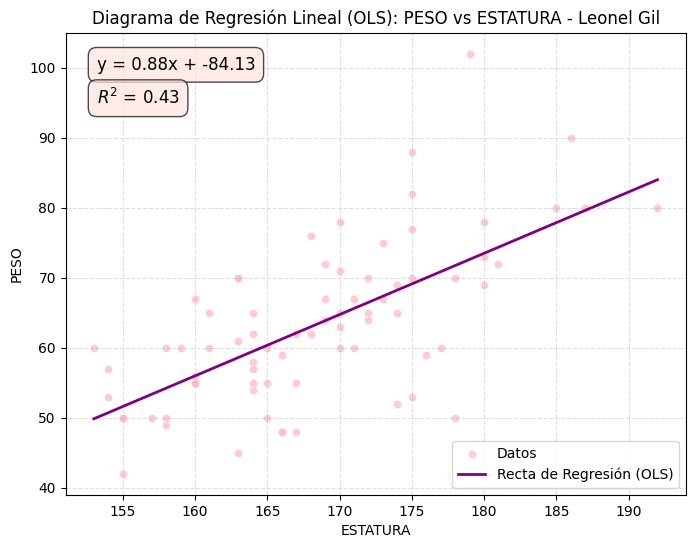

In [ ]:
# @title **C. Diagrama de Regresión y Recta (OLS)**

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define independent and dependent variables (using the already defined df3 and reg)
datax = df3['ESTATURA']
datay = df3['PESO']

# Get the OLS regression parameters
p0_ols = reg.params['const']
p1_ols = reg.params['ESTATURA']
r_squared = reg.rsquared  # R-squared value

# Define the function for the OLS line
def ols_line(x, p0, p1):
    return p0 + p1 * x

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(datax, datay, color="lightpink", label="Datos", alpha=0.7, edgecolors="white", linewidths=0.5)

# Plot regression line
x_plot = np.linspace(datax.min(), datax.max(), 100)
plt.plot(x_plot, ols_line(x_plot, p0_ols, p1_ols), color="purple", linewidth=2, label="Recta de Regresión (OLS)")

# Add regression info
equation_text = f'y = {p1_ols:.2f}x + {p0_ols:.2f}'
r_squared_text = f'$R^2$ = {r_squared:.2f}'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='mistyrose', alpha=0.7))
plt.text(0.05, 0.88, r_squared_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='mistyrose', alpha=0.7))

plt.xlabel("ESTATURA")
plt.ylabel("PESO")
plt.title("Diagrama de Regresión Lineal (OLS): PESO vs ESTATURA - Leonel Gil")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


# CONCLUSIÓN
### El laboratorio brindó la oportunidad de utilizar herramientas estadísticas en lenguaje Python siendo COLAB el medio para analizar y modelar datos reales. Se mostró claramente cómo la limpieza, visualización y modelado (como el bootstrap y la regresión lineal) ayudan a entender mejor los patrones y las relaciones entre las variables. Además, se reforzaron conceptos clave como la normalidad, la correlación y la predicción a través de mínimos cuadrados.

[⬆️ Volver al inicio](#inicio)